* Código abaixo realiza uma consulta ao site https://www.receitaws.com.br e faz a coleta dos dados cadastrais abertos das empresas que estão dentro do XML através de lista de CNPJs que estão salvos dentro do excel.

In [ ]:
# Importação das bibliotecas necessárias para executar o código.

from bs4 import BeautifulSoup
import requests as req
import pandas as pd
import numpy as np
import time as tm
from google.colab import files

In [ ]:
# Como o endereço deve estar no excel: https://www.receitaws.com.br/v1/cnpj/01653887000180.

# Aqui fazemos a indicação do caminho do arquivo para a carga dos dados.

lista = files.upload()

Saving lista.xlsx to lista.xlsx


In [ ]:
# Leitura dos dados do excel, conversão do mesmo para uma lista e colocando eles em objetos.

df = pd.read_excel('lista.xlsx')
lista = df['caminho'].tolist
coleta = list(range(0))

In [ ]:
# Criação do loping para a coleta de cada registro (Obs cada coleta leva 20s devido a restrição de coleta do site).
# A coleta pula a primeira linha do arquivo através do n = 1 e vai colocando em uma lista.

n = 1

for n in lista():
    resp = req.get(n)
    info = BeautifulSoup(resp.text, 'lxml')
    coleta.append(info)
    tm.sleep(20)


In [ ]:
# Conversão da lista em dataframe e envio e save em excel
# Coleta o tamanho da lista para parametrizar o reshape dos dados e os escreve e salva em excel.

qt = len(coleta)

coleta = np.array(coleta).reshape(qt, 1)

ler = pd.DataFrame(coleta)

ler.to_excel("lista_pronta.xlsx", index = False)


# Depois de coletados os dados os mesmos são tratados no power query através do excel.

Abaixo local dos dados:

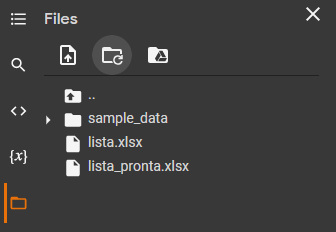